In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:
df1 = pd.read_csv(r"C:\Users\ARUN KUMAR\Batch_261_ Python Innomatics\Web_Scrapping_Project\final.csv", index_col=0)
df1

Company_Name                              Role_Name      Area_Name  \
0          Adoremyspace  Junior Social Media Marketing Manager          Delhi   
1      Vision Earthcare                  Junior Civil Engineer         Mumbai   
2    DreamHii Creatives                       Graphic Designer          Noida   
3    Monami Hospitality              Corporate Sales Executive      Bangalore   
4            GMGR INDIA         Business Development Executive         Mumbai   
..                  ...                                    ...            ...   
681           RAS Media             Client Acquisition Manager         Jaipur   
682           RAS Media             Client Acquisition Manager     Chandigarh   
683           BDNT Labs              Regional Business Manager          Delhi   
684           BDNT Labs            Digital Marketing Executive  Visakhapatnam   
685           BDNT Labs              Chartered Accountant (CA)      Ghaziabad   

              Join_Date    Salary  Min_Exp_years  Max_Exp_years Posted_On  
0    Starts Immediately  2,00,000              0              2   3 weeks  
1    Starts Immediately  2,00,000              1              1    7 days  
2    Starts Immediately  2,00,000              0              2    6 days  
3    Starts Immediately  3,00,000              0              5    5 days  
4    Starts Immediately  3,50,000              0              2    4 days  
..                  ...       ...            ...            ...       ...  
681  Starts Immediately  2,50,000              0              2     Today  
682  Starts Immediately  2,50,000              0              2     Today  
683  Starts Immediately  5,00,000              3              4     Today  
684  Starts Immediately  4,00,000              0              1     Today  
685  Starts Immediately  5,00,000              3              4     Today  

[686 rows x 8 columns]

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Name   686 non-null    object
 1   Role_Name      686 non-null    object
 2   Area_Name      686 non-null    object
 3   Join_Date      686 non-null    object
 4   Salary         686 non-null    object
 5   Min_Exp_years  686 non-null    int64 
 6   Max_Exp_years  686 non-null    int64 
 7   Posted_On      686 non-null    object
dtypes: int64(2), object(6)
memory usage: 48.2+ KB


In [4]:
# Handle missing values and convert to string
df1["Salary"] = df1["Salary"].fillna("").astype(str).str.replace(",", "").astype(float)
df1["Min_Exp_years"] = df1["Min_Exp_years"].fillna("").astype(float)
df1["Max_Exp_years"] = df1["Max_Exp_years"].fillna("").astype(float)

# Convert string columns to lowercase and strip whitespace
df1["Area_Name"] = df1["Area_Name"].str.lower().str.strip()
df1["Role_Name"] = df1["Role_Name"].str.lower().str.strip()

In [5]:
df1["Posted_On"]

0      3 weeks
1       7 days
2       6 days
3       5 days
4       4 days
        ...   
681      Today
682      Today
683      Today
684      Today
685      Today
Name: Posted_On, Length: 686, dtype: object

In [6]:
import datetime

# Convert durations to specific dates based on a reference date
today = datetime.datetime.today().strftime('%Y-%m-%d')
df1['Posted_On'] = df1['Posted_On'].replace({'Today': today})
df1['Posted_On'] = df1['Posted_On'].str.extract('(\d+)').astype(float)  # Extract numeric part
df1['Posted_On'] = pd.to_timedelta(df1['Posted_On'], unit='D') + pd.Timestamp(today)

# Convert the 'Posted_On' column to datetime format
df1['Posted_On'] = pd.to_datetime(df1['Posted_On'])


In [7]:
categorical_columns = df1.select_dtypes(include='object').columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
continuous_columns = df1.select_dtypes(include='float64').columns
discrete_columns = df1.select_dtypes(include='int64').columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['Company_Name', 'Role_Name', 'Area_Name', 'Join_Date'], dtype='object')
Numerical Columns: Index(['Salary', 'Min_Exp_years', 'Max_Exp_years'], dtype='object')


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Name   686 non-null    object        
 1   Role_Name      686 non-null    object        
 2   Area_Name      686 non-null    object        
 3   Join_Date      686 non-null    object        
 4   Salary         686 non-null    float64       
 5   Min_Exp_years  686 non-null    float64       
 6   Max_Exp_years  686 non-null    float64       
 7   Posted_On      686 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 48.2+ KB


In [9]:
# Handle missing values and convert to string
df1["Salary"] = df1["Salary"].fillna("").astype(str).str.replace(",", "").astype(float)
df1["Min_Exp_years"] = df1["Min_Exp_years"].fillna("").astype(float)
df1["Max_Exp_years"] = df1["Max_Exp_years"].fillna("").astype(float)

# Convert string columns to lowercase and strip whitespace
df1["Area_Name"] = df1["Area_Name"].str.lower().str.strip()
df1["Role_Name"] = df1["Role_Name"].str.lower().str.strip()

In [10]:
df1

Company_Name                              Role_Name      Area_Name  \
0          Adoremyspace  junior social media marketing manager          delhi   
1      Vision Earthcare                  junior civil engineer         mumbai   
2    DreamHii Creatives                       graphic designer          noida   
3    Monami Hospitality              corporate sales executive      bangalore   
4            GMGR INDIA         business development executive         mumbai   
..                  ...                                    ...            ...   
681           RAS Media             client acquisition manager         jaipur   
682           RAS Media             client acquisition manager     chandigarh   
683           BDNT Labs              regional business manager          delhi   
684           BDNT Labs            digital marketing executive  visakhapatnam   
685           BDNT Labs              chartered accountant (ca)      ghaziabad   

              Join_Date    Salary  Min_Exp_years  Max_Exp_years  Posted_On  
0    Starts Immediately  200000.0            0.0            2.0 2024-02-26  
1    Starts Immediately  200000.0            1.0            1.0 2024-03-01  
2    Starts Immediately  200000.0            0.0            2.0 2024-02-29  
3    Starts Immediately  300000.0            0.0            5.0 2024-02-28  
4    Starts Immediately  350000.0            0.0            2.0 2024-02-27  
..                  ...       ...            ...            ...        ...  
681  Starts Immediately  250000.0            0.0            2.0 2029-09-08  
682  Starts Immediately  250000.0            0.0            2.0 2029-09-08  
683  Starts Immediately  500000.0            3.0            4.0 2029-09-08  
684  Starts Immediately  400000.0            0.0            1.0 2029-09-08  
685  Starts Immediately  500000.0            3.0            4.0 2029-09-08  

[686 rows x 8 columns]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Name   686 non-null    object        
 1   Role_Name      686 non-null    object        
 2   Area_Name      686 non-null    object        
 3   Join_Date      686 non-null    object        
 4   Salary         686 non-null    float64       
 5   Min_Exp_years  686 non-null    float64       
 6   Max_Exp_years  686 non-null    float64       
 7   Posted_On      686 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 48.2+ KB


# Uni-variate 
* Univariate analysis of a categorical column using non-visual techniques

In [12]:
categorical_columns

Index(['Company_Name', 'Role_Name', 'Area_Name', 'Join_Date'], dtype='object')

In [13]:
# Frequency Table
frequency_table = df1["Company_Name"].value_counts()

# Count of non-null values
count_non_null = df1["Company_Name"].count()

# Number of unique categories
num_unique_categories = df1["Company_Name"].nunique()

# List of unique categories
unique_categories = df1["Company_Name"].unique()

# Summary Statistics
summary_statistics = df1["Company_Name"].describe()

# Print the results
print("Frequency Table for", "Company_Name")
print(frequency_table)
print()

print("Count of non-null values for", "Company_Name", ":", count_non_null)
print()

print("Number of unique categories for", "Company_Name", ":", num_unique_categories)
print()

print("List of unique categories for", "Company_Name", ":", unique_categories)
print()

print("Summary Statistics for", "Company_Name")
print(summary_statistics)

Frequency Table for Company_Name
BDNT Labs               98
RAS Media               70
A V Savla               70
Girl Power              70
Prepca Eduserv          28
Crossing Hurdles        28
Universal Adventures    28
Atelierish Media        28
Techdome Solutions      14
Globus Thenken          14
Global Media            14
Ramyoz                  14
PlanetSpark             14
Branch Karma            14
CloudBird Digital       14
Adoremyspace            14
Grow2Viral              14
Vision Earthcare        14
Axe Consultancy         14
Paisabazaar             14
JP Financial            14
OnePaper Research       14
Teach For               14
GMGR INDIA              14
Monami Hospitality      14
DreamHii Creatives      14
Bosscoder Academy       14
Name: Company_Name, dtype: int64

Count of non-null values for Company_Name : 686

Number of unique categories for Company_Name : 27

List of unique categories for Company_Name : ['Adoremyspace' 'Vision Earthcare' 'DreamHii Creatives'
 'M

In [14]:
# Frequency Table
frequency_table = df1["Role_Name"].value_counts()

# Count of non-null values
count_non_null = df1["Role_Name"].count()

# Number of unique categories
num_unique_categories = df1["Role_Name"].nunique()

# List of unique categories
unique_categories = df1["Role_Name"].unique()

# Summary Statistics
summary_statistics = df1["Role_Name"].describe()

# Print the results
print("Frequency Table for", "Role_Name")
print(frequency_table)
print()

print("Count of non-null values for", "Role_Name", ":", count_non_null)
print()

print("Number of unique categories for", "Role_Name", ":", num_unique_categories)
print()

print("List of unique categories for", "Role_Name", ":", unique_categories)
print()

print("Summary Statistics for", "Role_Name")
print(summary_statistics)


Frequency Table for Role_Name
corporate sales executive                             42
business development executive                        42
client acquisition manager                            42
ui/ux designer                                        28
telecaller                                            28
operations associate                                  28
junior operations specialist                          14
senior recruiter                                      14
operations executive                                  14
english teacher -work from home                       14
junior operations executive                           14
game developer                                        14
senior search engine optimization (seo) specialist    14
junior social media marketing manager                 14
solar design engineer                                 14
video/content creator                                 14
associate android app developer                       14
f

In [15]:
# Frequency Table
frequency_table = df1["Area_Name"].value_counts()

# Count of non-null values
count_non_null = df1["Area_Name"].count()

# Number of unique categories
num_unique_categories = df1["Area_Name"].nunique()

# List of unique categories
unique_categories = df1["Area_Name"].unique()

# Summary Statistics
summary_statistics = df1["Area_Name"].describe()

# Print the results
print("Frequency Table for", "Area_Name")
print(frequency_table)
print()

print("Count of non-null values for", "Area_Name", ":", count_non_null)
print()

print("Number of unique categories for", "Area_Name", ":", num_unique_categories)
print()

print("List of unique categories for", "Area_Name", ":", unique_categories)
print()

print("Summary Statistics for", "Area_Name")
print(summary_statistics)


Frequency Table for Area_Name
mumbai           168
noida             98
delhi             84
pune              70
chennai           42
surat             28
kolkata           28
gurgaon           28
bangalore         28
dehradun          14
amritsar          14
indore            14
thane             14
jaipur            14
chandigarh        14
visakhapatnam     14
ghaziabad         14
Name: Area_Name, dtype: int64

Count of non-null values for Area_Name : 686

Number of unique categories for Area_Name : 17

List of unique categories for Area_Name : ['delhi' 'mumbai' 'noida' 'bangalore' 'chennai' 'thane' 'gurgaon'
 'dehradun' 'kolkata' 'amritsar' 'indore' 'pune' 'surat' 'jaipur'
 'chandigarh' 'visakhapatnam' 'ghaziabad']

Summary Statistics for Area_Name
count        686
unique        17
top       mumbai
freq         168
Name: Area_Name, dtype: object


In [16]:
# Frequency Table
frequency_table = df1["Join_Date"].value_counts()

# Count of non-null values
count_non_null = df1["Join_Date"].count()

# Number of unique categories
num_unique_categories = df1["Join_Date"].nunique()

# List of unique categories
unique_categories = df1["Join_Date"].unique()

# Summary Statistics
summary_statistics = df1["Join_Date"].describe()

# Print the results
print("Frequency Table for", "Join_Date")
print(frequency_table)
print()

print("Count of non-null values for", "Join_Date", ":", count_non_null)
print()

print("Number of unique categories for", "Join_Date", ":", num_unique_categories)
print()

print("List of unique categories for", "Join_Date", ":", unique_categories)
print()

print("Summary Statistics for", "Join_Date")
print(summary_statistics)


Frequency Table for Join_Date
Starts Immediately    686
Name: Join_Date, dtype: int64

Count of non-null values for Join_Date : 686

Number of unique categories for Join_Date : 1

List of unique categories for Join_Date : ['Starts\xa0Immediately']

Summary Statistics for Join_Date
count                    686
unique                     1
top       Starts Immediately
freq                     686
Name: Join_Date, dtype: object


In [17]:
# Frequency Table
frequency_table = df1["Posted_On"].value_counts()

# Count of non-null values
count_non_null = df1["Posted_On"].count()

# Number of unique categories
num_unique_categories = df1["Posted_On"].nunique()

# List of unique categories
unique_categories = df1["Posted_On"].unique()

# Summary Statistics
summary_statistics = df1["Posted_On"].describe()

# Print the results
print("Frequency Table for", "Posted_On")
print(frequency_table)
print()

print("Count of non-null values for", "Posted_On", ":", count_non_null)
print()

print("Number of unique categories for", "Posted_On", ":", num_unique_categories)
print()

print("List of unique categories for", "Posted_On", ":", unique_categories)
print()

print("Summary Statistics for", "Posted_On")
print(summary_statistics)


Frequency Table for Posted_On
2029-09-08    588
2024-02-25     28
2024-02-26     14
2024-03-01     14
2024-02-29     14
2024-02-28     14
2024-02-27     14
Name: Posted_On, dtype: int64

Count of non-null values for Posted_On : 686

Number of unique categories for Posted_On : 7

List of unique categories for Posted_On : ['2024-02-26T00:00:00.000000000' '2024-03-01T00:00:00.000000000'
 '2024-02-29T00:00:00.000000000' '2024-02-28T00:00:00.000000000'
 '2024-02-27T00:00:00.000000000' '2024-02-25T00:00:00.000000000'
 '2029-09-08T00:00:00.000000000']

Summary Statistics for Posted_On
count                     686
unique                      7
top       2029-09-08 00:00:00
freq                      588
first     2024-02-25 00:00:00
last      2029-09-08 00:00:00
Name: Posted_On, dtype: object


C:\Users\ARUN KUMAR\AppData\Local\Temp\ipykernel_29108\2029674981.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_statistics = df1["Posted_On"].describe()


 #### Univariate analysis of a categorical column using visual techniques

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

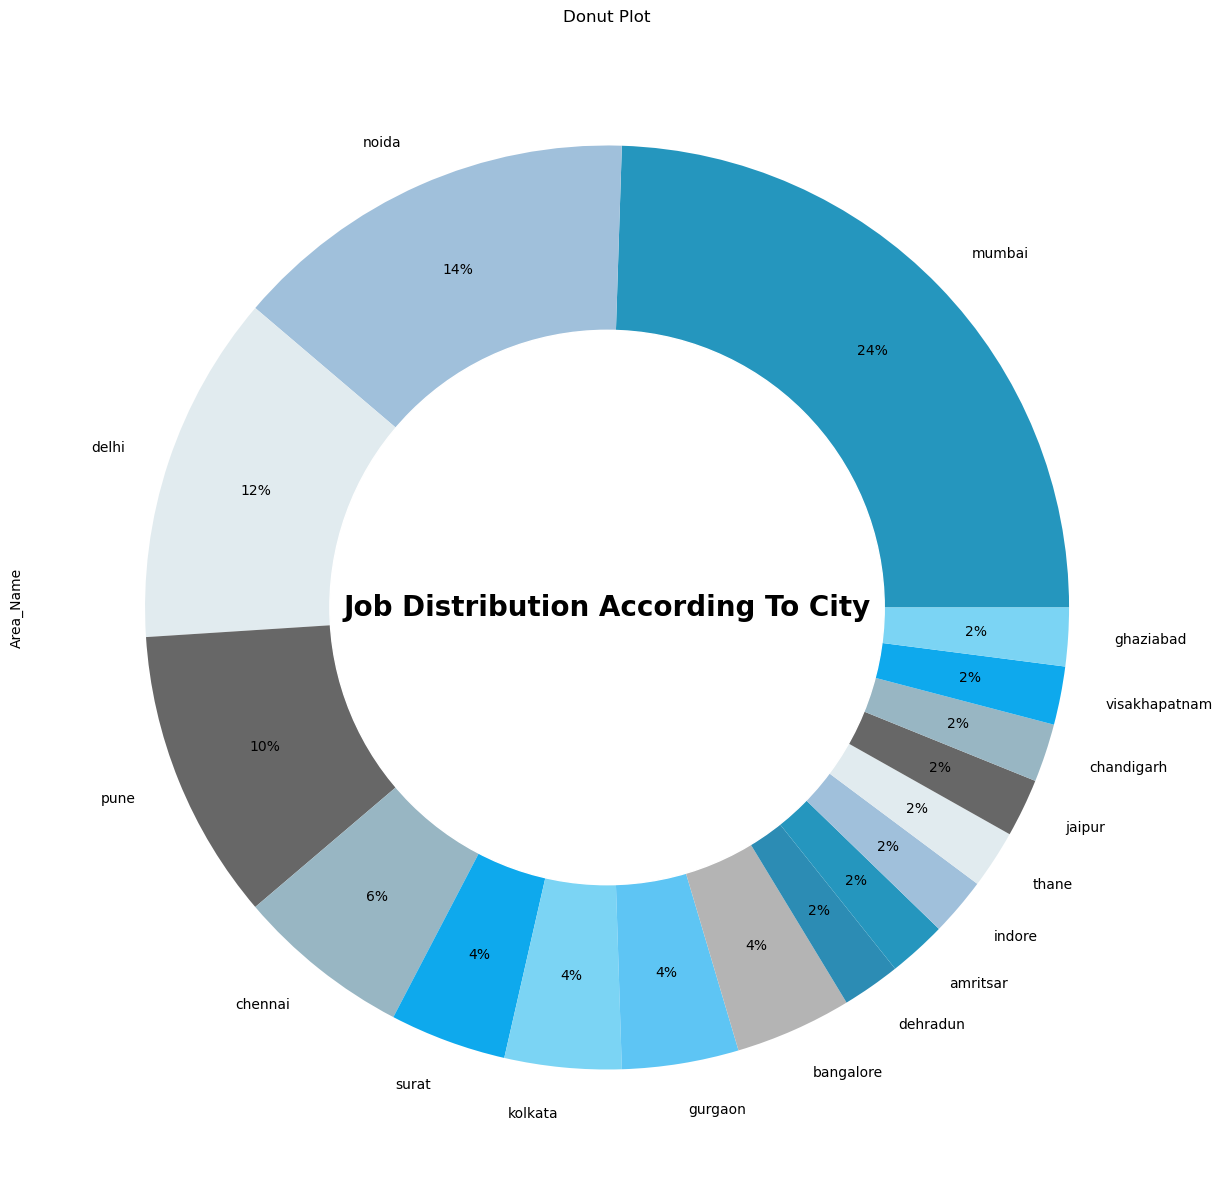

In [19]:
plt.figure(figsize=(20, 15))
# Outer pie (whole data)
plt.subplot(111, aspect='equal')
df1['Area_Name'].value_counts().plot.pie(autopct="%1.f%%", radius=1, pctdistance=0.8, colors = ['#2596be',"#a0c0db", "#e1ebef","#676767","#98b6c3","#0ea9ed","#7bd4f4","#5ec5f4","#b4b4b4","#2c8cb4"])
# Inner pie (cutout)
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
# Add content in the middle
plt.text(0, 0, "Job Distribution According To City", ha='center', va='center', fontsize=20, fontweight='bold', zorder=2)
plt.title("Donut Plot")
plt.show()

#####  <center>Upon analyzing the Donut plot, it is evident that the majority of companies are offering opportunities in Mumbai, followed closely by Noida and Delhi. This distribution suggests that Mumbai is the leading location for job prospects among the sampled companies, with Noida and Delhi also emerging as prominent hubs for employment opportunities. Such insights can inform job seekers and businesses alike in making informed decisions regarding talent acquisition, expansion strategies, and resource allocation.</center>

In [106]:
df3=df1["Company_Name"].value_counts().reset_index()
df3

index  Company_Name
0              BDNT Labs            98
1             Girl Power            70
2              RAS Media            70
3              A V Savla            70
4   Universal Adventures            28
5       Crossing Hurdles            28
6         Prepca Eduserv            28
7       Atelierish Media            28
8        Axe Consultancy            14
9           Global Media            14
10    DreamHii Creatives            14
11            Grow2Viral            14
12     OnePaper Research            14
13      Vision Earthcare            14
14          Branch Karma            14
15           Paisabazaar            14
16          JP Financial            14
17                Ramyoz            14
18    Techdome Solutions            14
19        Globus Thenken            14
20     CloudBird Digital            14
21    Monami Hospitality            14
22           PlanetSpark            14
23             Teach For            14
24            GMGR INDIA            14
25     Bosscoder Academy            14
26          Adoremyspace            14

In [108]:
df3["count"]=df3["Company_Name"]

In [113]:
df3.drop("index",axis=1,inplace=True)

In [112]:
df3["Company_Name"]=df3["index"]

In [114]:
df3

count          Company_Name
0      98             BDNT Labs
1      70            Girl Power
2      70             RAS Media
3      70             A V Savla
4      28  Universal Adventures
5      28      Crossing Hurdles
6      28        Prepca Eduserv
7      28      Atelierish Media
8      14       Axe Consultancy
9      14          Global Media
10     14    DreamHii Creatives
11     14            Grow2Viral
12     14     OnePaper Research
13     14      Vision Earthcare
14     14          Branch Karma
15     14           Paisabazaar
16     14          JP Financial
17     14                Ramyoz
18     14    Techdome Solutions
19     14        Globus Thenken
20     14     CloudBird Digital
21     14    Monami Hospitality
22     14           PlanetSpark
23     14             Teach For
24     14            GMGR INDIA
25     14     Bosscoder Academy
26     14          Adoremyspace

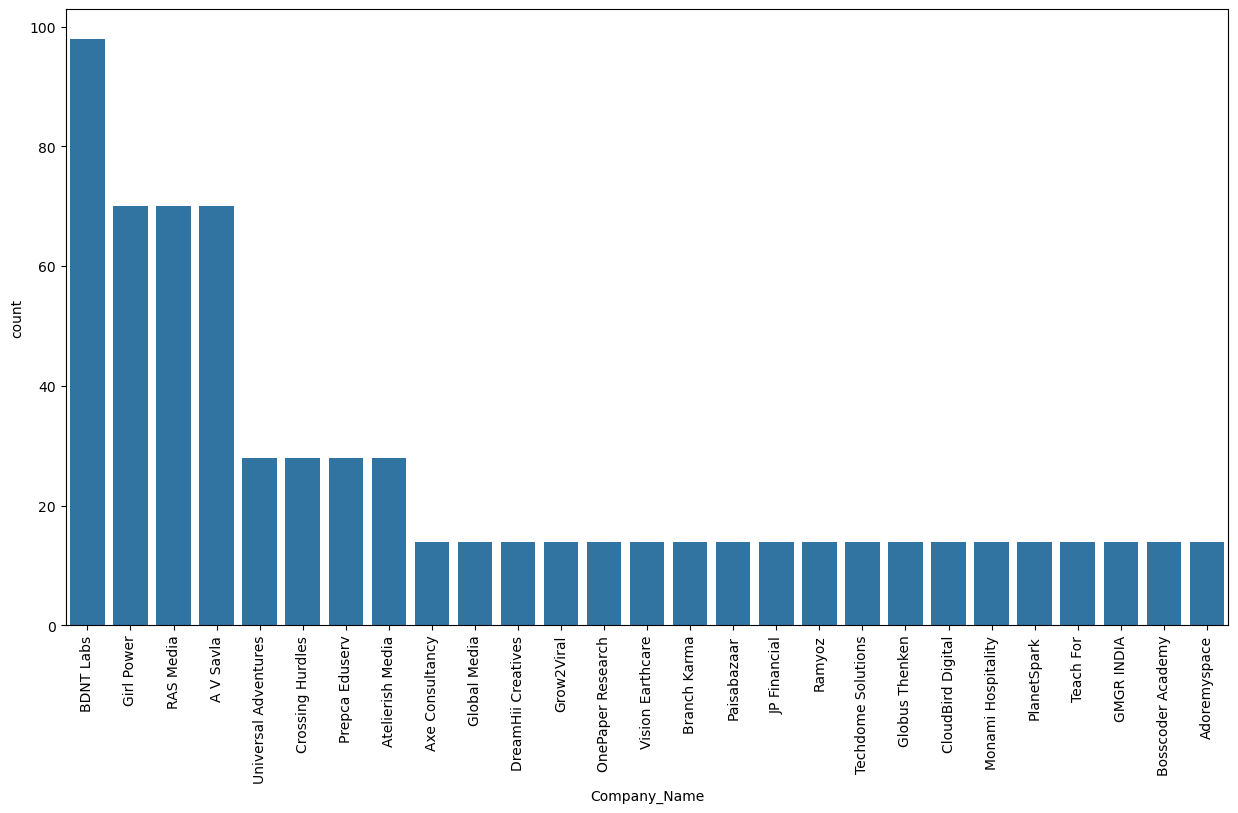

In [123]:
plt.figure(figsize=(15,8))
sns.barplot(data=df3,x="Company_Name",y="count")
plt.xticks(rotation=90)
plt.show()

####  <center>"BDNT Labs" shines as the top hirer in our dataset, indicating its strong presence in the job market. With numerous job postings, it's clear they're actively seeking talent, making them a key player in the industry. </center>

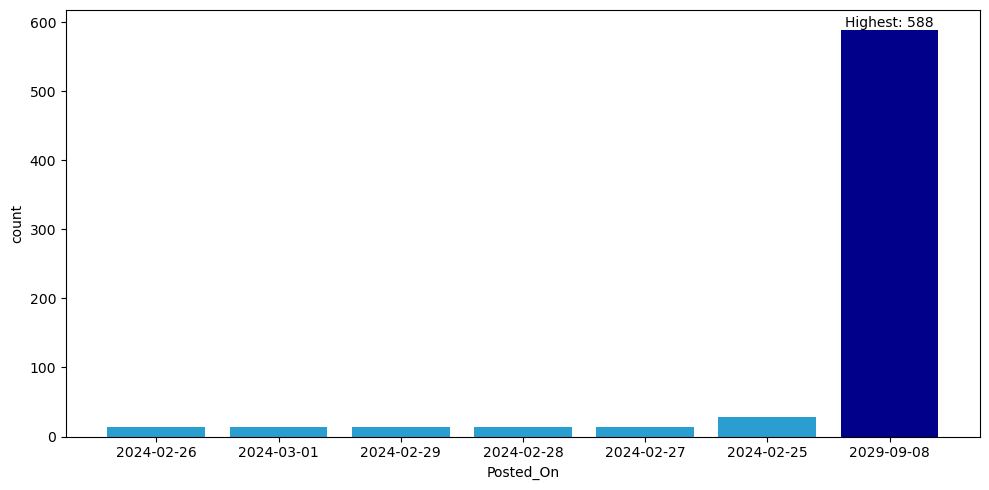

In [21]:
# Find the highest count and its corresponding category
highest_count = df1['Posted_On'].value_counts().max()
highest_bar_index = df1['Posted_On'].value_counts().idxmax()

# Convert timestamp to string format
highest_bar_index_str = highest_bar_index.strftime('%Y-%m-%d')

# Create the count plot with Seaborn's countplot function
plt.figure(figsize=(10, 5))
sns.countplot(x="Posted_On", data=df1, color="#0ea9ed")

# Highlight the highest bar
plt.bar(highest_bar_index_str, highest_count, color='darkblue')

# Annotate the plot with the highest count and its corresponding category
plt.text(highest_bar_index_str, highest_count, f'Highest: {highest_count}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


##### <center>2029-09-07 sees the most job postings, indicating a bustling job market. It's crucial to keep an eye on listings, especially on active days like today, to catch opportunities and stay ahead in your job search.</center>

## Univariate analysis of a continuous column using non-visual techniques
* continuous variables are a subset of numerical variables

In [22]:
numerical_columns 

Index(['Salary', 'Min_Exp_years', 'Max_Exp_years'], dtype='object')

In [23]:
#  Descriptive Statistics
salary_descriptive_stats = df1['Salary'].describe()
print("Descriptive Statistics for Salary:")
print(salary_descriptive_stats)

# Example: Grouping by job title and calculating mean salary
salary_by_job_title = df1.groupby('Role_Name')['Salary'].agg(['mean', 'median', 'std'])
print("Summary Statistics for Salary by Job Title:")
salary_by_job_title

Descriptive Statistics for Salary:
count       686.000000
mean     290632.653061
std      104316.107388
min      200000.000000
25%      200000.000000
50%      250000.000000
75%      348000.000000
max      500000.000000
Name: Salary, dtype: float64
Summary Statistics for Salary by Job Title:


mean    median  \
Role_Name                                                                     
administrative executive - back office              200000.000000  200000.0   
associate accountant                                200000.000000  200000.0   
associate android app developer                     500000.000000  500000.0   
backend developer                                   500000.000000  500000.0   
business development executive                      266666.666667  250000.0   
casting executive                                   200000.000000  200000.0   
chartered accountant (ca)                           500000.000000  500000.0   
chief direct tax analyst                            200000.000000  200000.0   
client acquisition manager                          250000.000000  250000.0   
client relationship manager                         200000.000000  200000.0   
content writer                                      340000.000000  340000.0   
corporate sales executive                           326666.666667  300000.0   
digital marketing associate                         340000.000000  340000.0   
digital marketing executive                         400000.000000  400000.0   
english teacher -work from home                     300000.000000  300000.0   
finance executive                                   250000.000000  250000.0   
full stack developer                                500000.000000  500000.0   
game developer                                      400000.000000  400000.0   
graphic designer                                    200000.000000  200000.0   
junior civil engineer                               200000.000000  200000.0   
junior graphic designer                             300000.000000  300000.0   
junior operations executive                         240000.000000  240000.0   
junior operations specialist                        200000.000000  200000.0   
junior social media marketing manager               200000.000000  200000.0   
marketing & communications associate                340000.000000  340000.0   
operations associate                                200000.000000  200000.0   
operations executive                                250000.000000  250000.0   
operations manager                                  240000.000000  240000.0   
press release strategist                            200000.000000  200000.0   
regional business manager                           500000.000000  500000.0   
sales associate                                     350000.000000  350000.0   
senior recruiter                                    200000.000000  200000.0   
senior search engine optimization (seo) specialist  200000.000000  200000.0   
solar design engineer                               500000.000000  500000.0   
teach for india fellow                              348000.000000  348000.0   
telecaller                                          200000.000000  200000.0   
telesales executive                                 223000.000000  223000.0   
ui/ux designer                                      295000.000000  295000.0   
video editor and graphic designer                   400000.000000  400000.0   
video/content creator                               200000.000000  200000.0   

                                                              std  
Role_Name                                                          
administrative executive - back office                   0.000000  
associate accountant                                     0.000000  
associate android app developer                          0.000000  
backend developer                                        0.000000  
business development executive                       63116.874427  
casting executive                                        0.000000  
chartered accountant (ca)                                0.000000  
chief direct tax analyst                                 0.000000  
client acquisition manager                               0.000

In [24]:
# Descriptive Statistics
min_exp_descriptive_stats = df1['Min_Exp_years'].describe()
print("Descriptive Statistics for Minimum Experience:")
print(min_exp_descriptive_stats)
print()
# Example: Grouping by job title and calculating mean minimum experience
min_exp_by_job_title = df1.groupby('Role_Name')['Min_Exp_years'].agg(['mean', 'median', 'std'])
print("Summary Statistics for Minimum Experience by Job Title:")
print(min_exp_by_job_title)


Descriptive Statistics for Minimum Experience:
count    686.000000
mean       0.734694
std        0.852403
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Min_Exp_years, dtype: float64

Summary Statistics for Minimum Experience by Job Title:
                                                        mean  median       std
Role_Name                                                                     
administrative executive - back office              0.000000     0.0  0.000000
associate accountant                                0.000000     0.0  0.000000
associate android app developer                     1.000000     1.0  0.000000
backend developer                                   3.000000     3.0  0.000000
business development executive                      0.000000     0.0  0.000000
casting executive                                   0.000000     0.0  0.000000
chartered accountant (ca)                           3.000000     3.0

In [25]:
# Descriptive Statistics for Maximum Experience
max_exp_descriptive_stats = df1['Max_Exp_years'].describe()
print("Descriptive Statistics for Maximum Experience:")
print(max_exp_descriptive_stats)
print()
# Summary Tables for Maximum Experience
max_exp_by_job_title = df1.groupby('Role_Name')['Max_Exp_years'].agg(['mean', 'median', 'std'])
print("Summary Statistics for Maximum Experience by Job Title:")
print(max_exp_by_job_title)

Descriptive Statistics for Maximum Experience:
count    686.000000
mean       2.591837
std        1.211691
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Max_Exp_years, dtype: float64

Summary Statistics for Maximum Experience by Job Title:
                                                        mean  median       std
Role_Name                                                                     
administrative executive - back office              2.000000     2.0  0.000000
associate accountant                                2.000000     2.0  0.000000
associate android app developer                     2.000000     2.0  0.000000
backend developer                                   4.000000     4.0  0.000000
business development executive                      1.666667     2.0  0.477119
casting executive                                   2.000000     2.0  0.000000
chartered accountant (ca)                           4.000000     4.0

## Univariate analysis of a continuous column using visual techniques
* continuous variables are a subset of numerical variables

In [26]:
# Plot histogram
plt.figure(figsize=(10,7))
sns.histplot(data=df1, x='Salary', color='#2596be')

# Find the bin with the highest frequency
highest_bin = df1['Salary'].value_counts().idxmax()


# Draw a vertical line at the position of the highest bin
plt.axvline(x=highest_bin, color='darkblue', linestyle='--', linewidth=3)
plt.xticks(rotation=90)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#####  Most employees earn an average salary between 200,000 to 250,000, highlighting a substantial portion of the workforce within this income range. This suggests that many workers enjoy a standard level of compensation, reflecting the prevailing salary norms within the industry or region. Understanding this salary distribution can help businesses tailor their compensation packages to attract and retain talent effectively.




In [27]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='Min_Exp_years', color='#2596be')
plt.title('Histogram of Minimum Experience')
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Frequency')
plt.show()



In [80]:
df1.sort_values("Min_Exp_years",ignore_index=True,ascending=False,inplace=True)

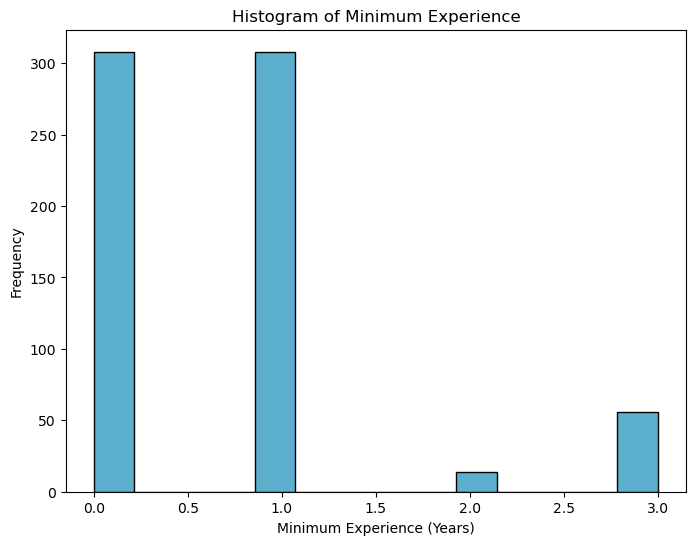

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='Min_Exp_years', color='#2596be')
plt.title('Histogram of Minimum Experience')
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Frequency')
plt.show()

##### Job postings specifying 0 or 1 years of experience indicate a preference for entry-level hires. This strategy likely supports talent development or cost-effective recruitment, offering opportunities for fresh talent to enter the workforce and align with the company's needs.

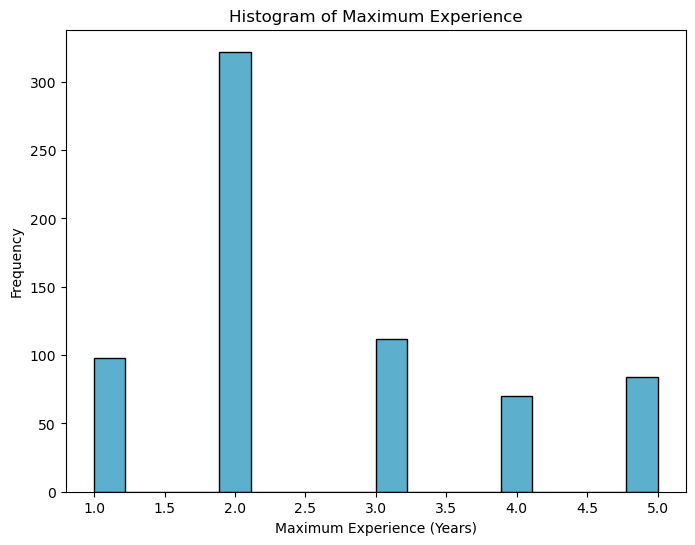

In [28]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='Max_Exp_years', color='#2596be')
plt.title('Histogram of Maximum Experience')
plt.xlabel('Maximum Experience (Years)')
plt.ylabel('Frequency')
plt.show()



##### Preferring candidates with under 2 years' experience streamlines hiring, nurturing talent for growth. It aligns with company goals and adapts to industry shifts.

# bi-variate

In [29]:
import matplotlib.colors as mcolors

In [30]:
categorical_columns

Index(['Company_Name', 'Role_Name', 'Area_Name', 'Join_Date'], dtype='object')

In [31]:
numerical_columns

Index(['Salary', 'Min_Exp_years', 'Max_Exp_years'], dtype='object')

### Num VS Num 







#### Bivariate analysis for numerical vs numerical column visual & non-visualizations"

In [32]:
spearman_corr = df1[['Min_Exp_years', 'Max_Exp_years']].corr(method='spearman').iloc[0, 1]

print("Spearman's correlation coefficient:", spearman_corr)

Spearman's correlation coefficient: 0.3186895569916149


In [33]:
covariance = np.cov(df1['Min_Exp_years'], df1['Max_Exp_years'])[0, 1]
covariance

0.402502606882168

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['Salary', 'Min_Exp_years', 'Max_Exp_years']].corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Correlation between Salary, Min_Exp_years, and Max_Exp_years')
plt.show()


##### 
* There is a positive correlation between salary and experience. This means that employees with more experience tend to earn more money.
* Employees with more experience tend to have higher minimum salary requirements.
* Employees with very high levels of experience may not earn as much money as employees with moderate levels of experience

## Num vs Cat

### Bivariate analysis for numerical vs categorical column visual & non-visualizations"

In [35]:
grouped_salary = df1.groupby('Role_Name')['Salary'].describe()
grouped_salary.T

Role_Name  administrative executive - back office  associate accountant  \
count                                        14.0                  14.0   
mean                                     200000.0              200000.0   
std                                           0.0                   0.0   
min                                      200000.0              200000.0   
25%                                      200000.0              200000.0   
50%                                      200000.0              200000.0   
75%                                      200000.0              200000.0   
max                                      200000.0              200000.0   

Role_Name  associate android app developer  backend developer  \
count                                 14.0               14.0   
mean                              500000.0           500000.0   
std                                    0.0                0.0   
min                               500000.0           500000.0   
25%                               500000.0           500000.0   
50%                               500000.0           500000.0   
75%                               500000.0           500000.0   
max                               500000.0           500000.0   

Role_Name  business development executive  casting executive  \
count                           42.000000               14.0   
mean                        266666.666667           200000.0   
std                          63116.874427                0.0   
min                         200000.000000           200000.0   
25%                         200000.000000           200000.0   
50%                         250000.000000           200000.0   
75%                         350000.000000           200000.0   
max                         350000.000000           200000.0   

Role_Name  chartered accountant (ca)  chief direct tax analyst  \
count                           14.0                      14.0   
mean                        500000.0                  200000.0   
std                              0.0                       0.0   
min                         500000.0                  200000.0   
25%                         500000.0                  200000.0   
50%                         500000.0                  200000.0   
75%                         500000.0                  200000.0   
max                         500000.0                  200000.0   

Role_Name  client acquisition manager  client relationship manager  ...  \
count                            42.0                         14.0  ...   
mean                         250000.0                     200000.0  ...   
std                               0.0                          0.0  ...   
min                          250000.0                     200000.0  ...   
25%                          250000.0                     200000.0  ...   
50%                          250000.0                     200000.0  ...   
75%                          250000.0                     200000.0  ...   
max                          250000.0                     200000.0  ...   

Role_Name  sales associate  senior recruiter  \
count                 14.0              14.0   
mean              350000.0          200000.0   
std                    0.0               0.0   
min               350000.0          200000.0   
25%               350000.0          200000.0   
50%               350000.0          200000.0   
75%               350000.0          200000.0   
max               350000.0          200000.0   

Role_Name  senior search engine optimization (seo) specialist  \
count                                                   14.0    
mean                                                200000.0    
std                                                      0.0    
min                                                 200000.0    
25%                                                 200000.0    
50%                                                 200000.0    
75

In [36]:
# Pivot table to summarize data by Area_Name and calculate average Salary
pivot_table_salary = df1.pivot_table(index='Area_Name', values='Salary', aggfunc=['mean', 'median', 'std'])
pivot_table_salary.T

Area_Name      amritsar      bangalore  chandigarh        chennai  dehradun  \
mean   Salary  340000.0  250000.000000    250000.0  342666.666667  240000.0   
median Salary  340000.0  250000.000000    250000.0  340000.000000  240000.0   
std    Salary       0.0   50917.507722         0.0    3816.949789       0.0   

Area_Name              delhi  ghaziabad        gurgaon    indore    jaipur  \
mean   Salary  306666.666667   500000.0  250000.000000  250000.0  250000.0   
median Salary  295000.000000   500000.0  250000.000000  250000.0  250000.0   
std    Salary  105776.911564        0.0   50917.507722       0.0       0.0   

Area_Name       kolkata         mumbai          noida           pune  \
mean   Salary  200000.0  268583.333333  274285.714286  290000.000000   
median Salary  200000.0  200000.000000  200000.000000  250000.000000   
std    Salary       0.0  111795.065752  108371.259552  112159.306992   

Area_Name              surat     thane  visakhapatnam  
mean   Salary  450000.000000  250000.0       400000.0  
median Salary  450000.000000  250000.0       400000.0  
std    Salary   50917.507722       0.0            0.0

In [37]:
# Pivot table to summarize data by Area_Name and calculate average values for all numerical columns
pivot_table_data = df1.pivot_table(index='Area_Name', values=['Salary', 'Min_Exp_years', 'Max_Exp_years'],aggfunc=['mean', 'median', 'std'])
pivot_table_data.T

Area_Name             amritsar      bangalore  chandigarh        chennai  \
mean   Max_Exp_years       2.0       3.500000         2.0       2.000000   
       Min_Exp_years       1.0       0.000000         0.0       0.333333   
       Salary         340000.0  250000.000000    250000.0  342666.666667   
median Max_Exp_years       2.0       3.500000         2.0       2.000000   
       Min_Exp_years       1.0       0.000000         0.0       0.000000   
       Salary         340000.0  250000.000000    250000.0  340000.000000   
std    Max_Exp_years       0.0       1.527525         0.0       0.000000   
       Min_Exp_years       0.0       0.000000         0.0       0.477119   
       Salary              0.0   50917.507722         0.0    3816.949789   

Area_Name             dehradun          delhi  ghaziabad        gurgaon  \
mean   Max_Exp_years       2.0       2.333333        4.0       2.500000   
       Min_Exp_years       1.0       1.000000        3.0       1.000000   
       Salary         240000.0  306666.666667   500000.0  250000.000000   
median Max_Exp_years       2.0       2.000000        4.0       2.500000   
       Min_Exp_years       1.0       1.000000        3.0       1.000000   
       Salary         240000.0  295000.000000   500000.0  250000.000000   
std    Max_Exp_years       0.0       0.948472        0.0       0.509175   
       Min_Exp_years       0.0       1.006006        0.0       0.000000   
       Salary              0.0  105776.911564        0.0   50917.507722   

Area_Name               indore    jaipur   kolkata         mumbai  \
mean   Max_Exp_years       3.0       2.0       1.0       2.666667   
       Min_Exp_years       1.0       0.0       1.0       0.750000   
       Salary         250000.0  250000.0  200000.0  268583.333333   
median Max_Exp_years       3.0       2.0       1.0       2.000000   
       Min_Exp_years       1.0       0.0       1.0       1.000000   
       Salary         250000.0  250000.0  200000.0  200000.000000   
std    Max_Exp_years       0.0       0.0       0.0       1.108847   
       Min_Exp_years       0.0       0.0       0.0       0.831635   
       Salary              0.0       0.0       0.0  111795.065752   

Area_Name                     noida           pune          surat     thane  \
mean   Max_Exp_years       2.142857       4.400000       3.000000       2.0   
       Min_Exp_years       0.285714       0.800000       2.000000       0.0   
       Salary         274285.714286  290000.000000  450000.000000  250000.0   
median Max_Exp_years       2.000000       5.000000       3.000000       2.0   
       Min_Exp_years       0.000000       1.000000       2.000000       0.0   
       Salary         200000.000000  250000.000000  450000.000000  250000.0   
std    Max_Exp_years       0.837276       1.208664       1.018350       0.0   
       Min_Exp_years       0.454077       0.753735       1.018350       0.0   
       Salary         108371.259552  112159.306992   50917.507722       0.0   

Area_Name             visakhapatnam  
mean   Max_Exp_years            1.0  
       Min_Exp_years            0.0  
       Salary              400000.0  
median Max_Exp_years            1.0  
       Min_Exp_years            0.0  
       Salary              400000.0  
std    Max_Exp_years            0.0  
       Min_Exp_years            0.0  
       Salary                   0.0

In [83]:
df1.sort_values("Salary",ascending=False,ignore_index=True,inplace=True)

In [88]:
df2=df1.groupby("Role_Name")["Salary"].mean().reset_index()

In [90]:
df2.sort_values("Salary",ascending=False,ignore_index=True,inplace=True)

<Axes: xlabel='Role_Name', ylabel='Salary'>

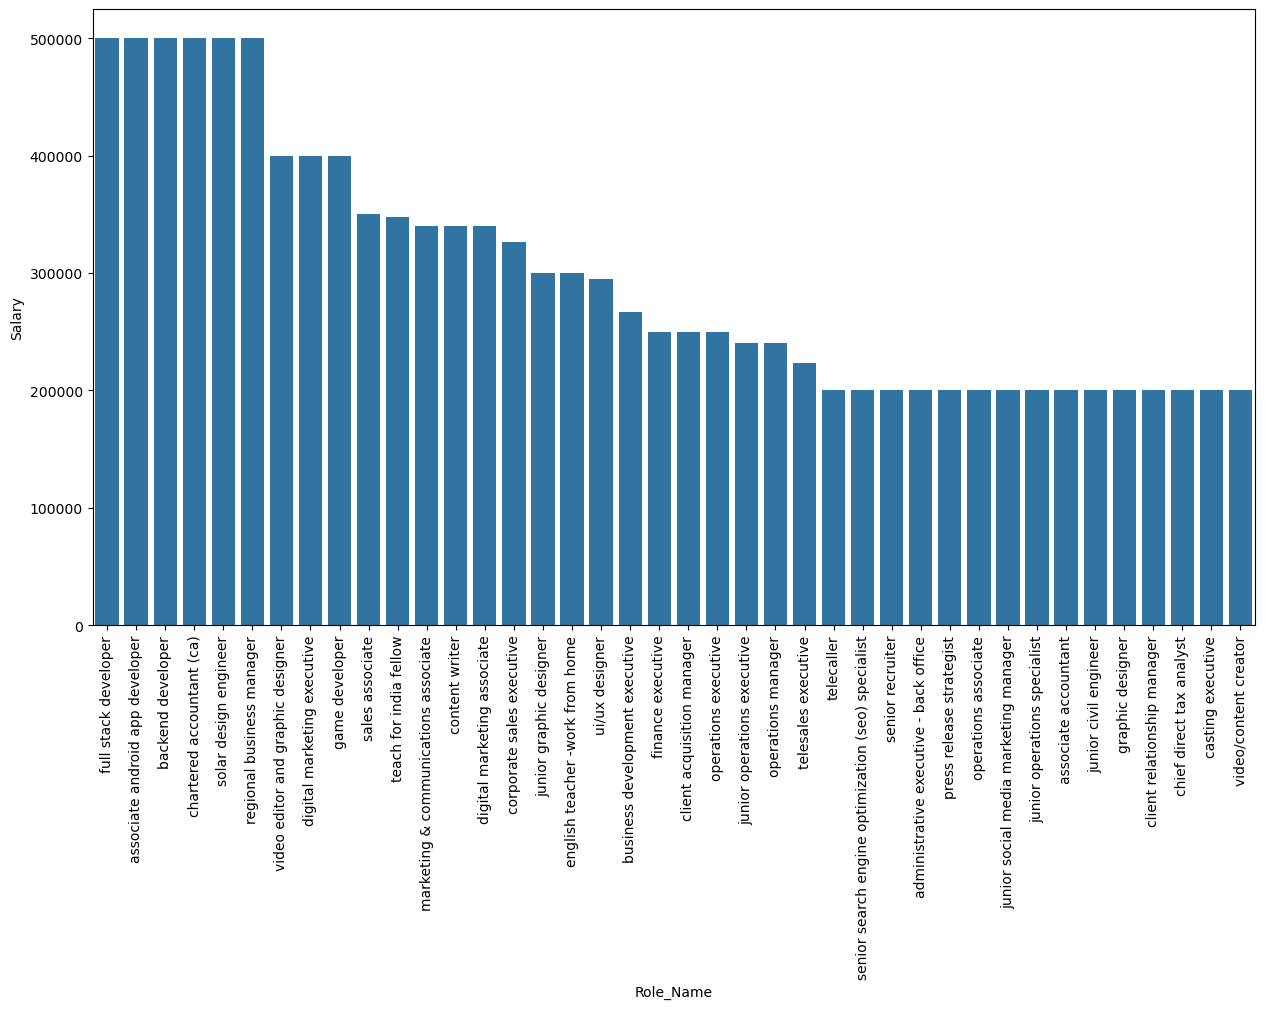

In [130]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.barplot(data=df2,x="Role_Name",y = "Salary")

In [140]:
df2

Role_Name         Salary
0                                full stack developer  500000.000000
1                     associate android app developer  500000.000000
2                                   backend developer  500000.000000
3                           chartered accountant (ca)  500000.000000
4                               solar design engineer  500000.000000
5                           regional business manager  500000.000000
6                   video editor and graphic designer  400000.000000
7                         digital marketing executive  400000.000000
8                                      game developer  400000.000000
9                                     sales associate  350000.000000
10                             teach for india fellow  348000.000000
11               marketing & communications associate  340000.000000
12                                     content writer  340000.000000
13                        digital marketing associate  340000.000000
14                          corporate sales executive  326666.666667
15                            junior graphic designer  300000.000000
16                    english teacher -work from home  300000.000000
17                                     ui/ux designer  295000.000000
18                     business development executive  266666.666667
19                                  finance executive  250000.000000
20                         client acquisition manager  250000.000000
21                               operations executive  250000.000000
22                        junior operations executive  240000.000000
23                                 operations manager  240000.000000
24                                telesales executive  223000.000000
25                                         telecaller  200000.000000
26  senior search engine optimization (seo) specia...  200000.000000
27                                   senior recruiter  200000.000000
28             administrative executive - back office  200000.000000
29                           press release strategist  200000.000000
30                               operations associate  200000.000000
31              junior social media marketing manager  200000.000000
32                       junior operations specialist  200000.000000
33                               associate accountant  200000.000000
34                              junior civil engineer  200000.000000
35                                   graphic designer  200000.000000
36                        client relationship manager  200000.000000
37                           chief direct tax analyst  200000.000000
38                                  casting executive  200000.000000
39                              video/content creator  200000.000000

###### Based on the information in the Data i have collected, it appears that the following roles typically offer salaries around 5LPA,  providing valuable guidance for job seekers and employers in setting salary expectations and crafting competitive compensation packages.
* Solar Design Engineer
* Backend Developer
* Associate Android App Developer
* Full Stack Developer
* Chartered Accountant
* Regional Business Manager

In [126]:
df5=df1.groupby("Company_Name")["Salary"].mean().reset_index()
df5.sort_values("Salary",ascending=False,ignore_index=True,inplace=True)

In [127]:
df5

Company_Name         Salary
0         Globus Thenken  500000.000000
1              BDNT Labs  471428.571429
2      Bosscoder Academy  400000.000000
3             GMGR INDIA  350000.000000
4              Teach For  348000.000000
5             Girl Power  342000.000000
6   Universal Adventures  340000.000000
7     Monami Hospitality  300000.000000
8            PlanetSpark  300000.000000
9     Techdome Solutions  250000.000000
10     CloudBird Digital  250000.000000
11      Crossing Hurdles  250000.000000
12          JP Financial  250000.000000
13       Axe Consultancy  240000.000000
14                Ramyoz  240000.000000
15             RAS Media  230000.000000
16        Prepca Eduserv  225000.000000
17           Paisabazaar  223000.000000
18             A V Savla  200000.000000
19     OnePaper Research  200000.000000
20            Grow2Viral  200000.000000
21          Adoremyspace  200000.000000
22          Global Media  200000.000000
23    DreamHii Creatives  200000.000000
24          Branch Karma  200000.000000
25      Atelierish Media  200000.000000
26      Vision Earthcare  200000.000000

<Axes: xlabel='Company_Name', ylabel='Salary'>

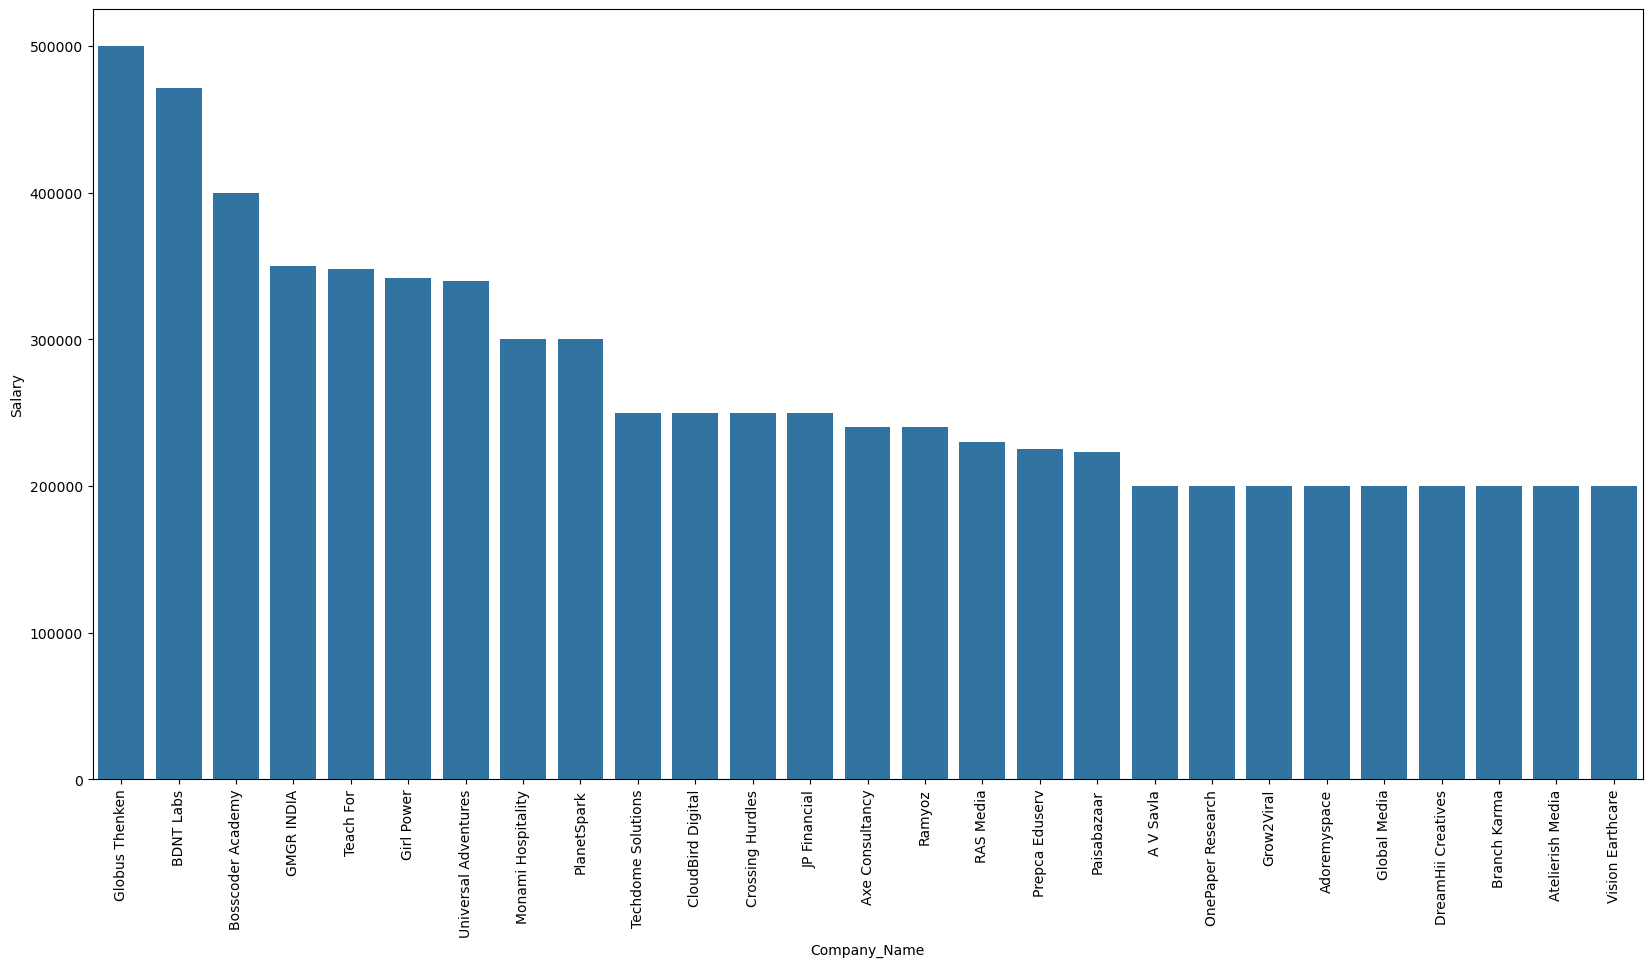

In [128]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(data=df5,x="Company_Name",y = "Salary",errorbar = None)

##### In reviewing the data, it's clear that "Globus Thenken" offers an average salary of 5 Lakhs Per Annum (LPA), which is higher compared to other companies. This highlights "Globus Thenken's" commitment to providing competitive pay, making it an attractive option for job seekers looking for better-paying opportunities. This information is valuable for both job seekers and employers in understanding salary trends and making informed decisions in the hiring process.


In [ ]:
df6=df1.groupby("Company_Name")["Salary"].mean().reset_index()
df6.sort_values("Salary",ascending=False,ignore_index=True,inplace=True)

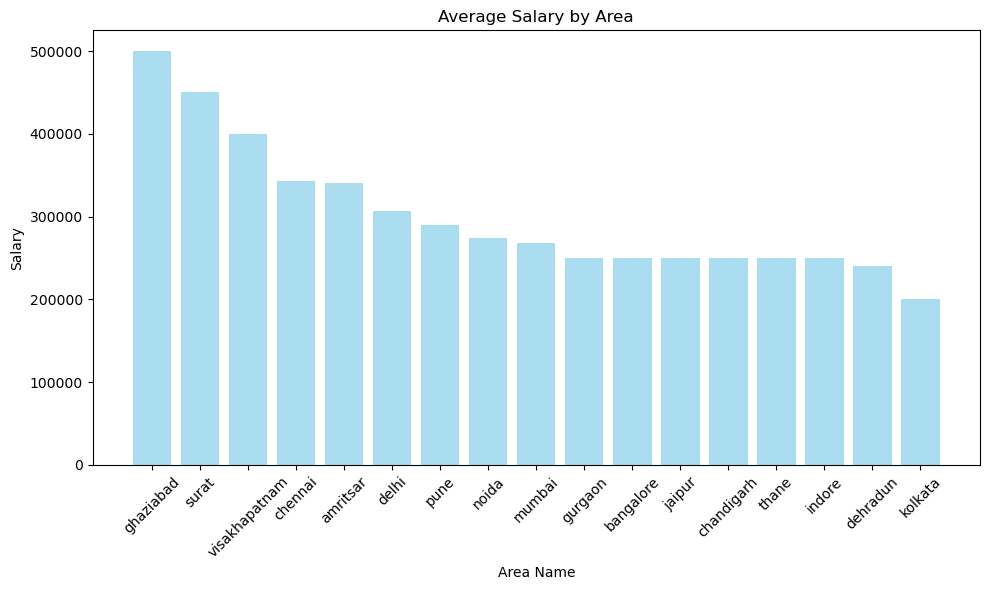

In [134]:
# Pivot table to summarize data by Area_Name and calculate average Salary, median Salary, and standard deviation of Salary
df7 = df1.pivot_table(index='Area_Name', values='Salary', aggfunc=['mean', 'median', 'std'])
df7.columns = ['Average Salary', 'Median Salary', 'Salary Standard Deviation']
df7 = df7.sort_values(by='Average Salary', ascending=False)

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df7.index, df7['Average Salary'], color='skyblue', alpha=0.7)
plt.title('Average Salary by Area')
plt.xlabel('Area Name')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### The graph reveals that Ghaziabad leads in offering the highest salaries, trailed by Surat and Visakhapatnam. This emphasizes how location influences pay rates. Recognizing these trends assists companies in crafting competitive compensation packages to attract top talent.

<Axes: xlabel='Min_Exp_years', ylabel='Salary'>

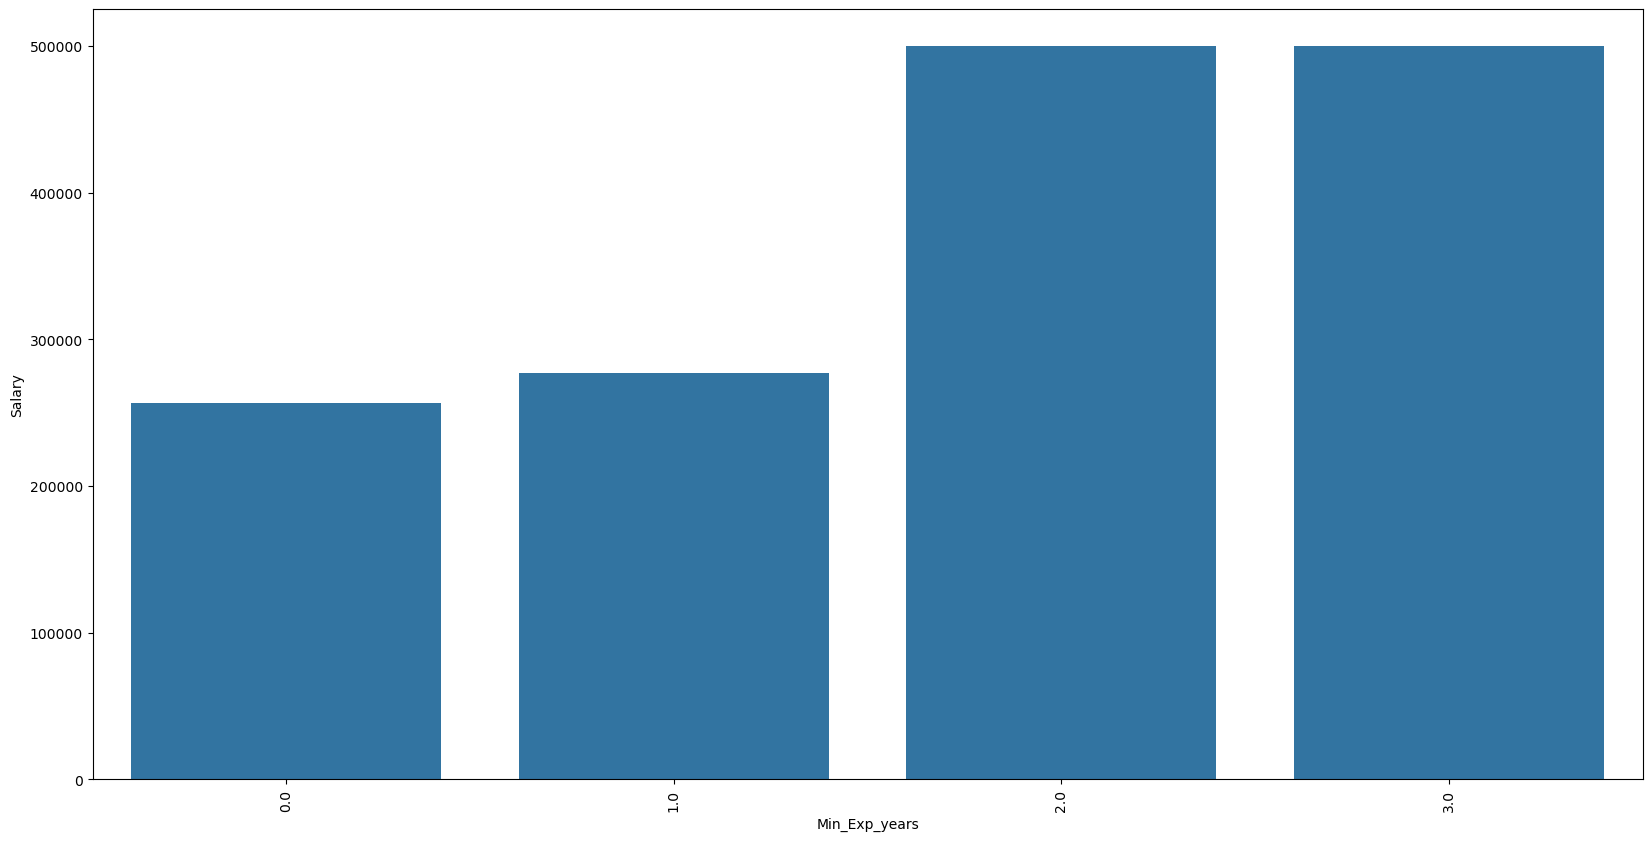

In [41]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(data=df1,x="Min_Exp_years",y = "Salary",errorbar = None)

<Axes: xlabel='Max_Exp_years', ylabel='Salary'>

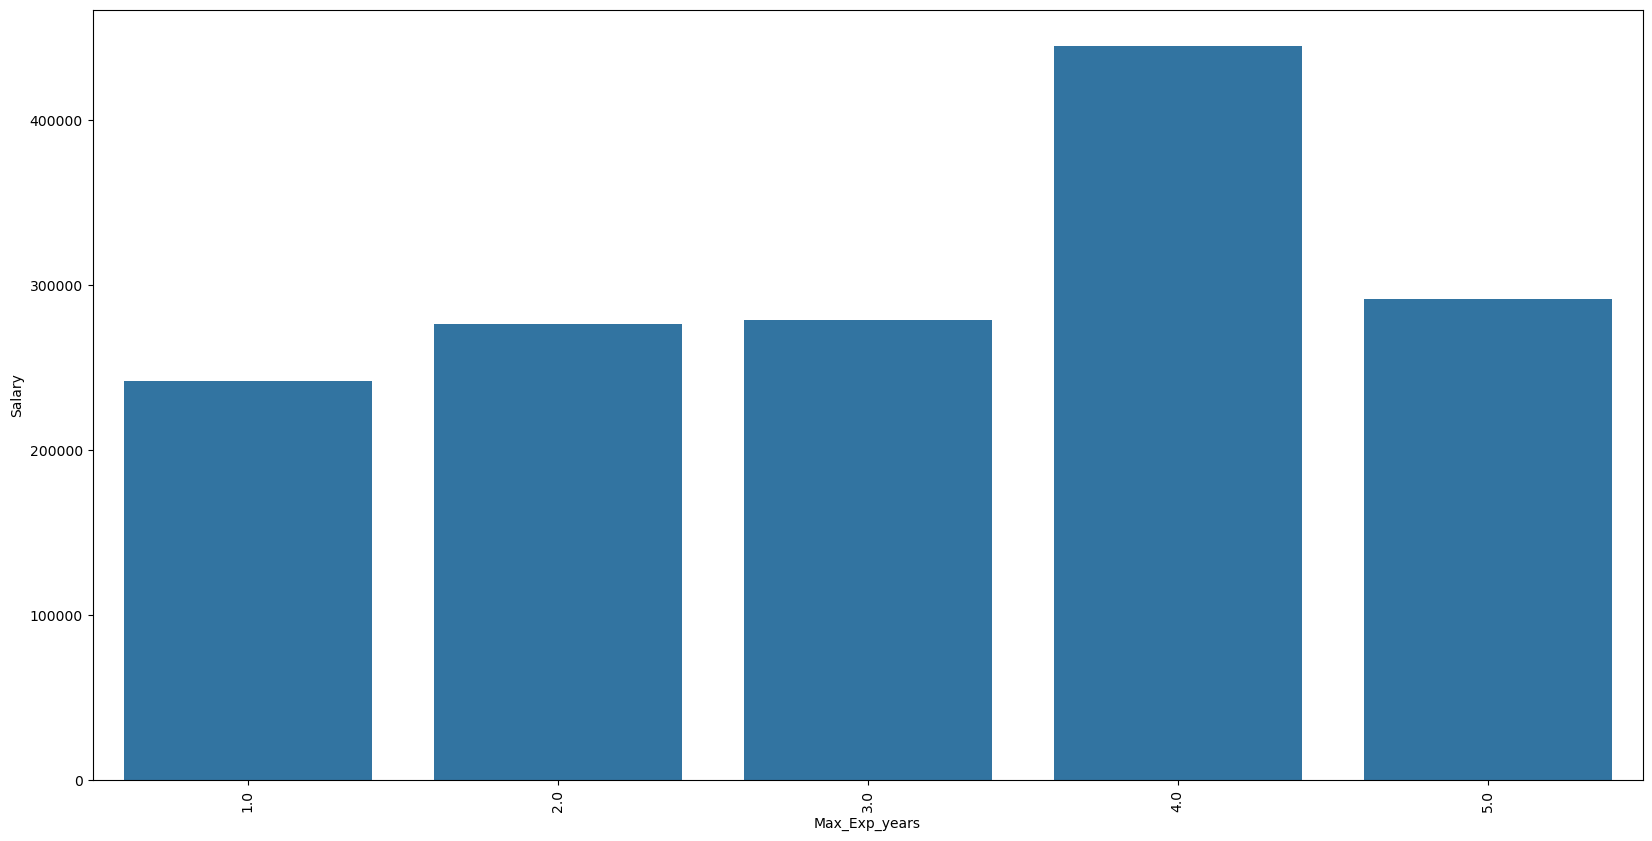

In [42]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(data=df1,x="Max_Exp_years",y = "Salary",errorbar = None)

## Cat Vs Cat

#### Bivariate analysis for categorical vs categorical column visual & non-visualizations"

In [43]:
categorical_columns

Index(['Company_Name', 'Role_Name', 'Area_Name', 'Join_Date'], dtype='object')

In [44]:
contingency_company_role = pd.crosstab(index=df1['Company_Name'], columns=df1['Role_Name'])
contingency_role_area = pd.crosstab(index=df1['Role_Name'], columns=df1['Area_Name'])

In [45]:
contingency_company_role

Role_Name             administrative executive - back office  \
Company_Name                                                   
A V Savla                                                 14   
Adoremyspace                                               0   
Atelierish Media                                           0   
Axe Consultancy                                            0   
BDNT Labs                                                  0   
Bosscoder Academy                                          0   
Branch Karma                                               0   
CloudBird Digital                                          0   
Crossing Hurdles                                           0   
DreamHii Creatives                                         0   
GMGR INDIA                                                 0   
Girl Power                                                 0   
Global Media                                               0   
Globus Thenken                                             0   
Grow2Viral                                                 0   
JP Financial                                               0   
Monami Hospitality                                         0   
OnePaper Research                                          0   
Paisabazaar                                                0   
PlanetSpark                                                0   
Prepca Eduserv                                             0   
RAS Media                                                  0   
Ramyoz                                                     0   
Teach For                                                  0   
Techdome Solutions                                         0   
Universal Adventures                                       0   
Vision Earthcare                                           0   

Role_Name             associate accountant  associate android app developer  \
Company_Name                                                                  
A V Savla                               14                                0   
Adoremyspace                             0                                0   
Atelierish Media                         0                                0   
Axe Consultancy                          0                                0   
BDNT Labs                                0                               14   
Bosscoder Academy                        0                                0   
Branch Karma                             0                                0   
CloudBird Digital                        0                                0   
Crossing Hurdles                         0                                0   
DreamHii Creatives                       0                                0   
GMGR INDIA                               0                                0   
Girl Power                               0                                0   
Global Media                             0                                0   
Globus Thenken                           0                                0   
Grow2Viral                               0                                0   
JP Financial                             0                                0   
Monami Hospitality                       0                                0   
OnePaper Research                        0                                0   
Paisabazaar                              0                                0   
PlanetSpark                              0                                0   
Prepca Eduserv                           0                                0   
RAS Media                                0                                0   
Ramyoz                                   0                                0   
Teach For                                0                                0   
Techdome Solutions                       0                                0   
Universal 

In [46]:
contingency_role_area

Area_Name                                           amritsar  bangalore  \
Role_Name                                                                 
administrative executive - back office                     0          0   
associate accountant                                       0          0   
associate android app developer                            0          0   
backend developer                                          0          0   
business development executive                             0         14   
casting executive                                          0          0   
chartered accountant (ca)                                  0          0   
chief direct tax analyst                                   0          0   
client acquisition manager                                 0          0   
client relationship manager                                0          0   
content writer                                             0          0   
corporate sales executive                                  0         14   
digital marketing associate                               14          0   
digital marketing executive                                0          0   
english teacher -work from home                            0          0   
finance executive                                          0          0   
full stack developer                                       0          0   
game developer                                             0          0   
graphic designer                                           0          0   
junior civil engineer                                      0          0   
junior graphic designer                                    0          0   
junior operations executive                                0          0   
junior operations specialist                               0          0   
junior social media marketing manager                      0          0   
marketing & communications associate                       0          0   
operations associate                                       0          0   
operations executive                                       0          0   
operations manager                                         0          0   
press release strategist                                   0          0   
regional business manager                                  0          0   
sales associate                                            0          0   
senior recruiter                                           0          0   
senior search engine optimization (seo) specialist         0          0   
solar design engineer                                      0          0   
teach for india fellow                                     0          0   
telecaller                                                 0          0   
telesales executive                                        0          0   
ui/ux designer                                             0          0   
video editor and graphic designer                          0          0   
video/content creator                                      0          0   

Area_Name                                           chandigarh  chennai  \
Role_Name                                                                 
administrative executive - back office                       0        0   
associate accountant                                         0        0   
associate android app developer                              0        0   
backend developer                                            0        0   
business development executive                               0        0   
casting executive                                            0        0   
chartered accountant (ca)                                    0        0   
chief direct tax analyst                                     0        0   
client acquisition manager                                  14        0   
client relationship mana

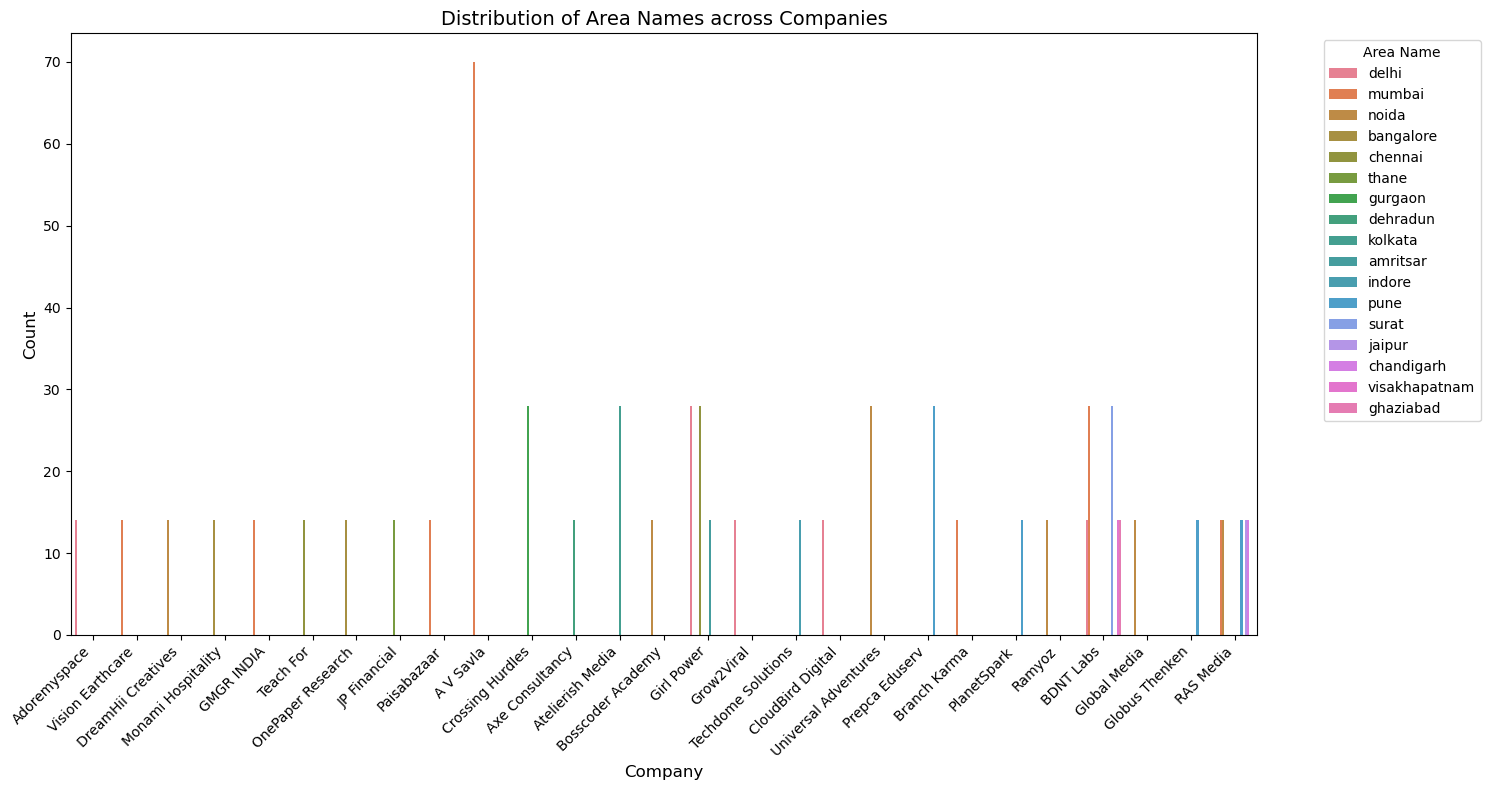

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df1, x='Company_Name', hue='Area_Name', dodge=True)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Area Names across Companies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [136]:
df1["count"]=1

Company_Name                              Role_Name  Area_Name  \
0           BDNT Labs              chartered accountant (ca)  ghaziabad   
1           BDNT Labs                   full stack developer     mumbai   
2      Globus Thenken                  solar design engineer       pune   
3      Globus Thenken                  solar design engineer       pune   
4      Globus Thenken                  solar design engineer       pune   
..                ...                                    ...        ...   
681  Crossing Hurdles                   operations associate    gurgaon   
682        Grow2Viral                  video/content creator      delhi   
683         RAS Media                             telecaller       pune   
684         RAS Media                      casting executive      noida   
685      Adoremyspace  junior social media marketing manager      delhi   

              Join_Date    Salary  Min_Exp_years  Max_Exp_years  Posted_On  
0    Starts Immediately  500000.0            3.0            4.0 2029-09-08  
1    Starts Immediately  500000.0            3.0            4.0 2029-09-08  
2    Starts Immediately  500000.0            2.0            5.0 2029-09-08  
3    Starts Immediately  500000.0            2.0            5.0 2029-09-08  
4    Starts Immediately  500000.0            2.0            5.0 2029-09-08  
..                  ...       ...            ...            ...        ...  
681  Starts Immediately  200000.0            1.0            2.0 2029-09-08  
682  Starts Immediately  200000.0            1.0            3.0 2029-09-08  
683  Starts Immediately  200000.0            0.0            2.0 2029-09-08  
684  Starts Immediately  200000.0            0.0            2.0 2029-09-08  
685  Starts Immediately  200000.0            0.0            2.0 2024-02-26  

[686 rows x 8 columns]

In [135]:
df1.groupby(["Company_Name","Area_Name"])[""]

Company_Name          Area_Name      Role_Name                                           Join_Date           Salary    Min_Exp_years  Max_Exp_years  Posted_On 
A V Savla             mumbai         administrative executive - back office              Starts Immediately  200000.0  0.0            2.0            2029-09-08    14
                                     associate accountant                                Starts Immediately  200000.0  0.0            2.0            2029-09-08    14
                                     chief direct tax analyst                            Starts Immediately  200000.0  1.0            3.0            2029-09-08    14
                                     client relationship manager                         Starts Immediately  200000.0  1.0            2.0            2029-09-08    14
                                     telecaller                                          Starts Immediately  200000.0  1.0            3.0            2029-09-08    14
Adoremyspa

###### In the visualization, "AV Slava" emerges prominently with 70 job postings specifically within the Delhi location. This suggests a strong recruitment focus by "AV Slava" in Delhi, indicative of potential growth or strategic initiatives in that region.

<Axes: xlabel='Company_Name', ylabel='Role_Name'>

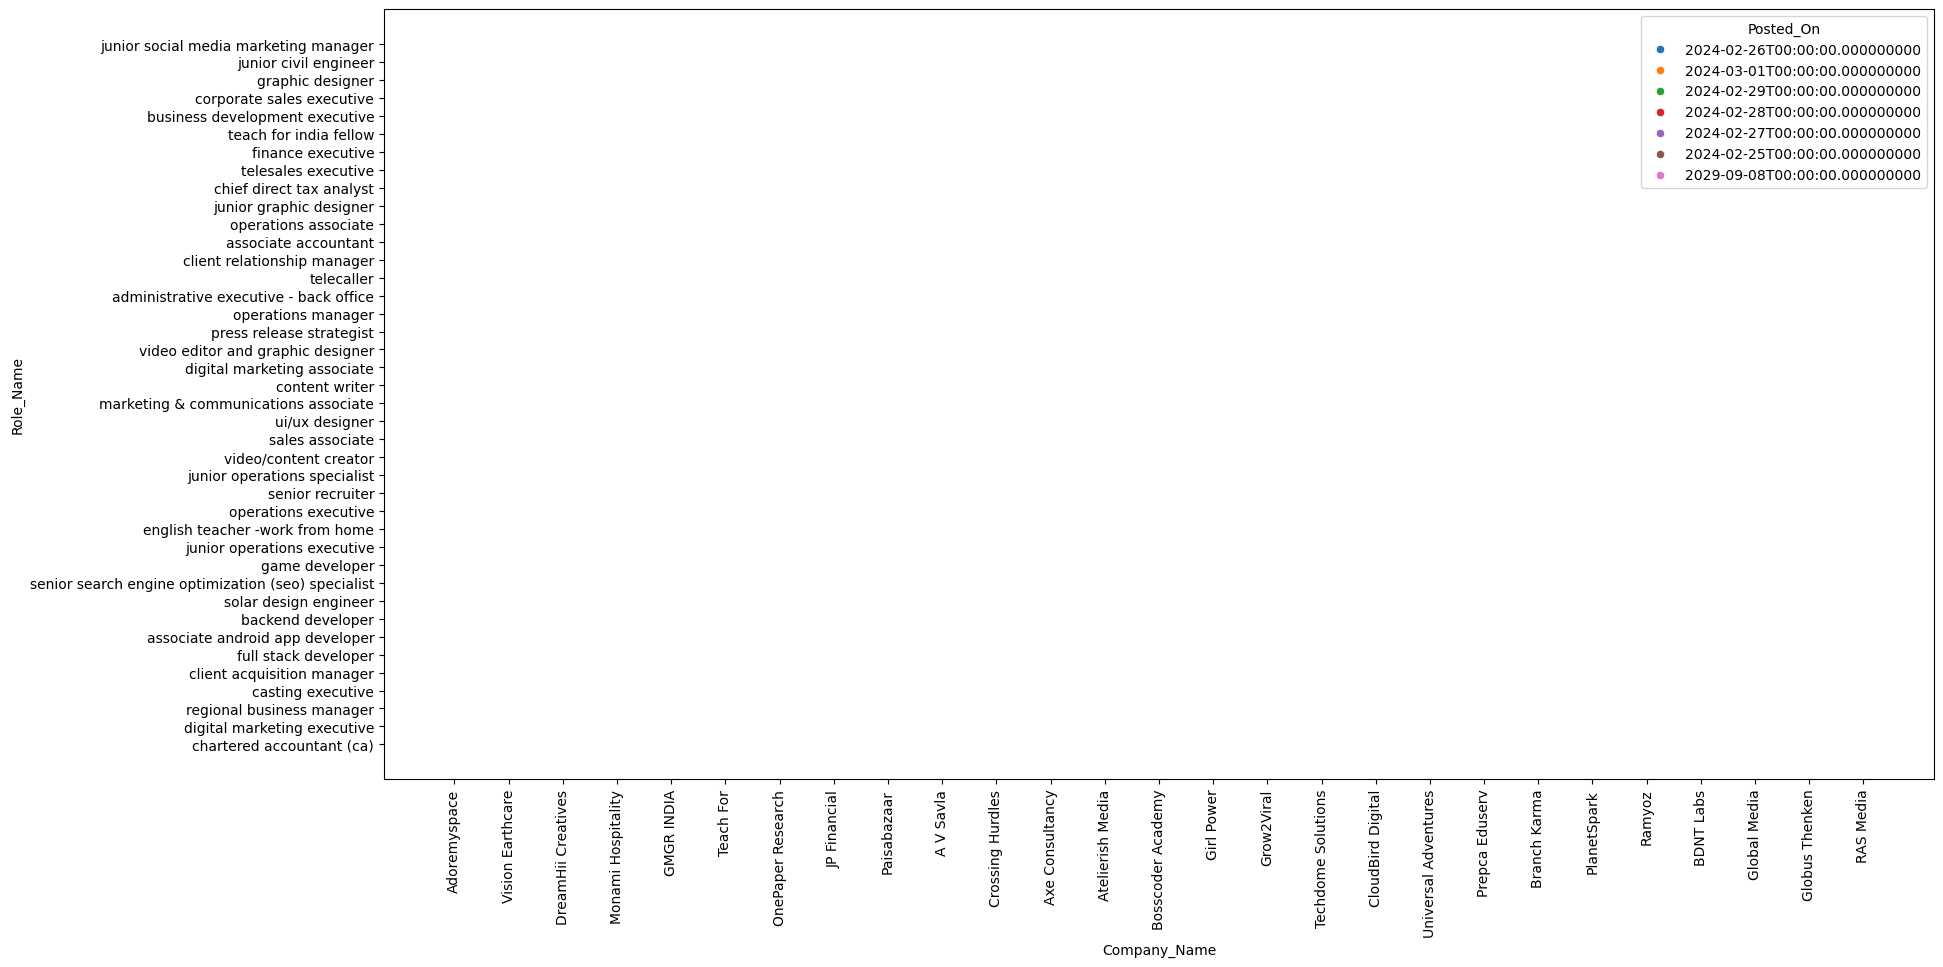

In [49]:
# 1. what are the Top 5 companies with the highest number of job postings


In [50]:
top_companies = df1['Company_Name'].value_counts().head(5)
top_companies

BDNT Labs         98
RAS Media         70
A V Savla         70
Girl Power        70
Prepca Eduserv    28
Name: Company_Name, dtype: int64

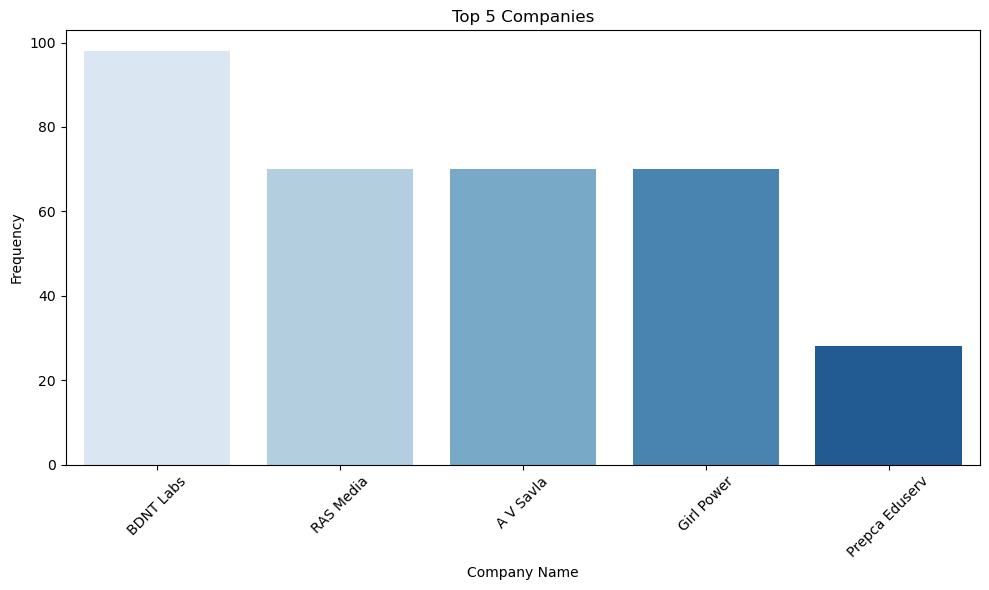

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values, hue=top_companies.index, palette='Blues', legend=False)
plt.title('Top 5 Companies')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
Ras media 
A salva 
sirk power 
prepca eduserv

In [52]:
### 2 . Which role has the highest average salary, and which role has the lowest average salary?


In [53]:
avg_salary_by_role = df1.groupby('Role_Name')['Salary'].mean()
highest_avg_salary_role = avg_salary_by_role.idxmax()
lowest_avg_salary_role = avg_salary_by_role.idxmin()
print("\n2. Role with the highest average salary:", highest_avg_salary_role)
print("   Role with the lowest average salary:", lowest_avg_salary_role)


2. Role with the highest average salary: associate android app developer
   Role with the lowest average salary: administrative executive - back office


In [54]:
##### Are there any correlations between salary and the minimum or maximum years of experience required for a role

In [55]:
correlation = df1[['Salary', 'Min_Exp_years', 'Max_Exp_years']].corr()
correlation

Salary  Min_Exp_years  Max_Exp_years
Salary         1.000000       0.603863       0.292287
Min_Exp_years  0.603863       1.000000       0.389701
Max_Exp_years  0.292287       0.389701       1.000000

In [56]:
#### What is the most common area for job postings, and which area has the highest average salary?


In [57]:
common_area = df1['Area_Name'].mode().iloc[0]
avg_salary_by_area = df1.groupby('Area_Name')['Salary'].mean()
highest_avg_salary_area = avg_salary_by_area.idxmax()
print("\n4. Most common area for job postings:", common_area)
print("   Area with the highest average salary:", highest_avg_salary_area)



4. Most common area for job postings: mumbai
   Area with the highest average salary: ghaziabad


In [58]:
### How does the distribution of salaries vary across different companies?


In [59]:
salary_distribution = df1.groupby('Company_Name')['Salary'].describe()
salary_distribution

count           mean            std       min       25%  \
Company_Name                                                                    
A V Savla              70.0  200000.000000       0.000000  200000.0  200000.0   
Adoremyspace           14.0  200000.000000       0.000000  200000.0  200000.0   
Atelierish Media       28.0  200000.000000       0.000000  200000.0  200000.0   
Axe Consultancy        14.0  240000.000000       0.000000  240000.0  240000.0   
BDNT Labs              98.0  471428.571429   45407.660919  400000.0  400000.0   
Bosscoder Academy      14.0  400000.000000       0.000000  400000.0  400000.0   
Branch Karma           14.0  200000.000000       0.000000  200000.0  200000.0   
CloudBird Digital      14.0  250000.000000       0.000000  250000.0  250000.0   
Crossing Hurdles       28.0  250000.000000   50917.507722  200000.0  200000.0   
DreamHii Creatives     14.0  200000.000000       0.000000  200000.0  200000.0   
GMGR INDIA             14.0  350000.000000       0.000000  350000.0  350000.0   
Girl Power             70.0  342000.000000    4028.881241  340000.0  340000.0   
Global Media           14.0  200000.000000       0.000000  200000.0  200000.0   
Globus Thenken         14.0  500000.000000       0.000000  500000.0  500000.0   
Grow2Viral             14.0  200000.000000       0.000000  200000.0  200000.0   
JP Financial           14.0  250000.000000       0.000000  250000.0  250000.0   
Monami Hospitality     14.0  300000.000000       0.000000  300000.0  300000.0   
OnePaper Research      14.0  200000.000000       0.000000  200000.0  200000.0   
Paisabazaar            14.0  223000.000000       0.000000  223000.0  223000.0   
PlanetSpark            14.0  300000.000000       0.000000  300000.0  300000.0   
Prepca Eduserv         28.0  225000.000000   25458.753861  200000.0  200000.0   
RAS Media              70.0  230000.000000   24671.758190  200000.0  200000.0   
Ramyoz                 14.0  240000.000000       0.000000  240000.0  240000.0   
Teach For              14.0  348000.000000       0.000000  348000.0  348000.0   
Techdome Solutions     14.0  250000.000000       0.000000  250000.0  250000.0   
Universal Adventures   28.0  340000.000000  142569.021621  200000.0  200000.0   
Vision Earthcare       14.0  200000.000000       0.000000  200000.0  200000.0   

                           50%       75%       max  
Company_Name                                        
A V Savla             200000.0  200000.0  200000.0  
Adoremyspace          200000.0  200000.0  200000.0  
Atelierish Media      200000.0  200000.0  200000.0  
Axe Consultancy       240000.0  240000.0  240000.0  
BDNT Labs             500000.0  500000.0  500000.0  
Bosscoder Academy     400000.0  400000.0  400000.0  
Branch Karma          200000.0  200000.0  200000.0  
CloudBird Digital     250000.0  250000.0  250000.0  
Crossing Hurdles      250000.0  300000.0  300000.0  
DreamHii Creatives    200000.0  200000.0  200000.0  
GMGR INDIA            350000.0  350000.0  350000.0  
Girl Power            340000.0  340000.0  350000.0  
Global Media          200000.0  200000.0  200000.0  
Globus Thenken        500000.0  500000.0  500000.0  
Grow2Viral            200000.0  200000.0  200000.0  
JP Financial          250000.0  250000.0  250000.0  
Monami Hospitality    300000.0  300000.0  300000.0  
OnePaper Research     200000.0  200000.0  200000.0  
Paisabazaar           223000.0  223000.0  223000.0  
PlanetSpark           300000.0  300000.0  300000.0  
Prepca Eduserv        225000.0  250000.0  250000.0  
RAS Media             250000.0  250000.0  250000.0  
Ramyoz                240000.0  240000.0  240000.0  
Teach For             348000.0  348000.0  348000.0  
Techdome Solutions    250000.0  250000.0  250000.0  
Universal Adventures  340000.0  480000.0  480000.0  
Vision Earthcare      200000.0  200000.0  200000.0

In [60]:
#### Are there any seasonal trends in job postings throughout the year?
df1['Posted_On'] = pd.to_datetime(df1['Posted_On'])
job_posting_seasonality = df1['Posted_On'].dt.month.value_counts().sort_index()
print("\n6. Seasonal trends in job postings:")
print(job_posting_seasonality)


6. Seasonal trends in job postings:
2     84
3     14
9    588
Name: Posted_On, dtype: int64



6. Seasonal trends in job postings:
2     84
3     14
9    588
Name: Posted_On, dtype: int64


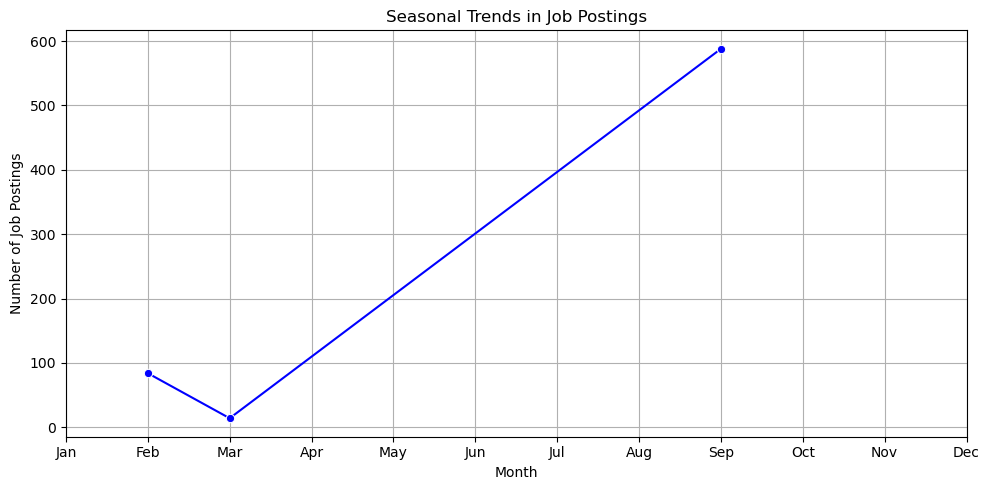

In [61]:

# Extract the month from the 'Posted_On' column and count job postings per month
job_posting_seasonality = df1['Posted_On'].dt.month.value_counts().sort_index()

print("\n6. Seasonal trends in job postings:")
print(job_posting_seasonality)

# Plot the seasonal trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=job_posting_seasonality.index, y=job_posting_seasonality.values, marker='o', color='blue')

plt.title('Seasonal Trends in Job Postings')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
### Which roles have the highest demand based on the frequency of job postings?


In [63]:
top_roles = df1['Role_Name'].value_counts().head()
top_roles

corporate sales executive         42
business development executive    42
client acquisition manager        42
ui/ux designer                    28
telecaller                        28
Name: Role_Name, dtype: int64

In [64]:
# Plotting the top roles
plt.figure(figsize=(10, 6))
top_roles.plot(kind='bar', color='skyblue')
plt.title('Top Roles Based on Number of Job Postings')
plt.xlabel('Role Name')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [65]:
#### Is there a relationship between the posted date and the salary offered for a role?


In [66]:
salary_posted_date_relationship = df1.groupby(df1['Posted_On'].dt.month)['Salary'].mean()
salary_posted_date_relationship

Posted_On
2    266333.333333
3    200000.000000
9    296261.904762
Name: Salary, dtype: float64

In [67]:
# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.plot(salary_posted_date_relationship.index, salary_posted_date_relationship.values, marker='o', color='orange', linestyle='-')
plt.title('Average Salary by Month of Job Postings')
plt.xlabel('Month')
plt.ylabel('Average Salary')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
#### Are there any outliers in the dataset, particularly in terms of salary or years of experience?


In [69]:
outliers = df1[(df1['Salary'] > df1['Salary'].quantile(0.95)) | (df1['Min_Exp_years'] > df1['Min_Exp_years'].quantile(0.95))]
outliers

Empty DataFrame
Columns: [Company_Name, Role_Name, Area_Name, Join_Date, Salary, Min_Exp_years, Max_Exp_years, Posted_On]
Index: []

In [70]:
outliers_max = df1[(df1['Salary'] > df1['Salary'].quantile(0.95)) | (df1['Max_Exp_years'] > df1['Max_Exp_years'].quantile(0.95))]
outliers_max

Empty DataFrame
Columns: [Company_Name, Role_Name, Area_Name, Join_Date, Salary, Min_Exp_years, Max_Exp_years, Posted_On]
Index: []

In [71]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of salaries
sns.histplot(data=outliers, x='Salary', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Salary (Outliers)')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')

# Plot the distribution of minimum experience years
sns.histplot(data=outliers, x='Min_Exp_years', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Minimum Experience Years (Outliers)')
axes[1].set_xlabel('Minimum Experience Years')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [72]:
### How do the salary distributions differ between different roles and areas?


In [73]:
salary_distribution_by_role = df1.groupby('Role_Name')['Salary'].describe()
salary_distribution_by_area = df1.groupby('Area_Name')['Salary'].describe()


In [74]:
print("Salary distributions by role and area:")
salary_distribution_by_role

Salary distributions by role and area:


count           mean  \
Role_Name                                                                  
administrative executive - back office               14.0  200000.000000   
associate accountant                                 14.0  200000.000000   
associate android app developer                      14.0  500000.000000   
backend developer                                    14.0  500000.000000   
business development executive                       42.0  266666.666667   
casting executive                                    14.0  200000.000000   
chartered accountant (ca)                            14.0  500000.000000   
chief direct tax analyst                             14.0  200000.000000   
client acquisition manager                           42.0  250000.000000   
client relationship manager                          14.0  200000.000000   
content writer                                       14.0  340000.000000   
corporate sales executive                            42.0  326666.666667   
digital marketing associate                          14.0  340000.000000   
digital marketing executive                          14.0  400000.000000   
english teacher -work from home                      14.0  300000.000000   
finance executive                                    14.0  250000.000000   
full stack developer                                 14.0  500000.000000   
game developer                                       14.0  400000.000000   
graphic designer                                     14.0  200000.000000   
junior civil engineer                                14.0  200000.000000   
junior graphic designer                              14.0  300000.000000   
junior operations executive                          14.0  240000.000000   
junior operations specialist                         14.0  200000.000000   
junior social media marketing manager                14.0  200000.000000   
marketing & communications associate                 14.0  340000.000000   
operations associate                                 28.0  200000.000000   
operations executive                                 14.0  250000.000000   
operations manager                                   14.0  240000.000000   
press release strategist                             14.0  200000.000000   
regional business manager                            14.0  500000.000000   
sales associate                                      14.0  350000.000000   
senior recruiter                                     14.0  200000.000000   
senior search engine optimization (seo) specialist   14.0  200000.000000   
solar design engineer                                14.0  500000.000000   
teach for india fellow                               14.0  348000.000000   
telecaller                                           28.0  200000.000000   
telesales executive                                  14.0  223000.000000   
ui/ux designer                                       28.0  295000.000000   
video editor and graphic designer                    14.0  400000.000000   
video/content creator                                14.0  200000.000000   

                                                              std       min  \
Role_Name                                                                     
administrative executive - back office                   0.000000  200000.0   
associate accountant                                     0.000000  200000.0   
associate android app developer                          0.000000  500000.0   
backend developer                                        0.000000  500000.0   
business development executive                       63116.874427  200000.0   
casting executive                                        0.000000  200000.0   
chartered accountant (ca)                                0.000000  500000.0   
chief direct tax analyst                                 0.000000  200000.0   
client acquisition manager                               0.000000  25

In [75]:
print("\n   Distribution by area:")
print(salary_distribution_by_area)


   Distribution by area:
               count           mean            std       min       25%  \
Area_Name                                                                
amritsar        14.0  340000.000000       0.000000  340000.0  340000.0   
bangalore       28.0  250000.000000   50917.507722  200000.0  200000.0   
chandigarh      14.0  250000.000000       0.000000  250000.0  250000.0   
chennai         42.0  342666.666667    3816.949789  340000.0  340000.0   
dehradun        14.0  240000.000000       0.000000  240000.0  240000.0   
delhi           84.0  306666.666667  105776.911564  200000.0  200000.0   
ghaziabad       14.0  500000.000000       0.000000  500000.0  500000.0   
gurgaon         28.0  250000.000000   50917.507722  200000.0  200000.0   
indore          14.0  250000.000000       0.000000  250000.0  250000.0   
jaipur          14.0  250000.000000       0.000000  250000.0  250000.0   
kolkata         28.0  200000.000000       0.000000  200000.0  200000.0   
mumbai      

In [76]:
# Scatter Plot of Salary vs. Experience
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Min_Exp_years', y='Salary', data=df1)
plt.title('Salary vs. Experience')
plt.xlabel('Minimum Years of Experience')
plt.ylabel('Salary')
plt.show()

In [139]:
df1.describe()

Salary  Min_Exp_years  Max_Exp_years
count     686.000000     686.000000     686.000000
mean   290632.653061       0.734694       2.591837
std    104316.107388       0.852403       1.211691
min    200000.000000       0.000000       1.000000
25%    200000.000000       0.000000       2.000000
50%    250000.000000       1.000000       2.000000
75%    348000.000000       1.000000       3.000000
max    500000.000000       3.000000       5.000000